# Lecture 7: Gradient Descent: An Example
## Wine Quality Prediction

![Fig.1](wine_quality.jpg "Wine Quality")

### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
These datasets can be viewed as classification or regression tasks.
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

#### Input features (based on physicochemical tests):
1 - fixed acidity.
2 - volatile acidity.
3 - citric acid.
4 - residual sugar.
5 - chlorides.
6 - free sulfur dioxide.
7 - total sulfur dioxide.
8 - density.
9 - pH.
10 - sulphates.
11 - alcohol.

#### Output variable (based on sensory data):
12 - quality (score between 0 and 10)


In [1]:
import pandas as pd
import numpy as np

In [2]:
## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print(X.shape, Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)# --> 0 to 1
np.max(X1, axis = 0)

(4898, 11) (4898,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(x, w):
    '''
    x: input feature vector
    w: weights
    
    return y_hat
    '''
    
    y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
    
    return y_hat

w = np.random.rand(12, 1)
x = X1[0, :]
print(x, w)
predict(x, w)

[0.30769231 0.18627451 0.21686747 0.30828221 0.10682493 0.14982578
 0.37354988 0.26778485 0.25454545 0.26744186 0.12903226] [[0.25710484]
 [0.67931508]
 [0.94213081]
 [0.68859826]
 [0.4322967 ]
 [0.65813821]
 [0.13110635]
 [0.48622739]
 [0.19762289]
 [0.81447919]
 [0.09307962]
 [0.79402925]]


array([[1.58339379]])

In [4]:
## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vector
    Y: targets
    '''
    m = len(Y)
    loss = 0
    for i in range(m):
        y_hat = predict(X[i, :], w)
        loss = loss + np.square(Y[i] - y_hat)
        #print(i, y_hat, Y[i], loss)
    loss = loss/(2)
    
    return loss

loss(w, X1, Y)

array([[43126.53124035]])

In [5]:
#(4) Optimization: Gradient Descent
def GD(X, Y, init_w, lr = 0.001, delta = 0.01, max_iter = 100):
    '''GD
    parameters:
        init_w: w^0
        X: training data
        Y: training target
        lr: learning rate
        max_iter: the max iterations of the while loop
        delta: threshold for the stopping condition
    
    return:
        w_star: w*
        
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = init_w
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter)
    w_hist = np.zeros((max_iter, init_w.shape[0]))
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) 
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist
        
init_w = np.random.rand(12, 1)
w_star, loss_hist, w_hist = GD(X1, Y, init_w, lr = 0.0001, delta = 0.01, max_iter = 100)

0 [[54193.18255274]]
1 [[3036.85901416]]
2 [[2023.10298224]]
3 [[1989.86626877]]
4 [[1976.2840697]]
5 [[1963.55614431]]
6 [[1951.29525385]]
7 [[1939.47489793]]
8 [[1928.07645533]]
9 [[1917.08225081]]
10 [[1906.4753845]]
11 [[1896.23969509]]
12 [[1886.35972701]]
13 [[1876.82069924]]
14 [[1867.60847538]]
15 [[1858.70953518]]
16 [[1850.11094724]]
17 [[1841.80034296]]
18 [[1833.76589168]]
19 [[1825.99627687]]
20 [[1818.48067339]]
21 [[1811.20872581]]
22 [[1804.17052762]]
23 [[1797.35660146]]
24 [[1790.7578801]]
25 [[1784.36568838]]
26 [[1778.17172591]]
27 [[1772.16805052]]
28 [[1766.34706249]]
29 [[1760.70148942]]
30 [[1755.22437182]]
31 [[1749.90904935]]
32 [[1744.74914762]]
33 [[1739.7385656]]
34 [[1734.87146362]]
35 [[1730.14225184]]
36 [[1725.5455793]]
37 [[1721.0763234]]
38 [[1716.72957988]]
39 [[1712.50065322]]
40 [[1708.38504751]]
41 [[1704.37845765]]
42 [[1700.47676103]]
43 [[1696.67600951]]
44 [[1692.97242175]]
45 [[1689.36237599]]
46 [[1685.84240297]]
47 [[1682.40917934]]
48 [[16

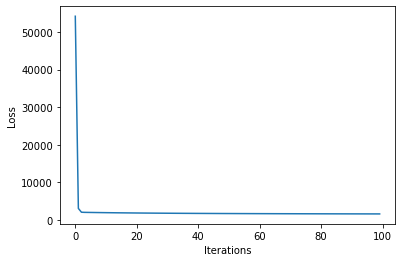

In [7]:
# show the Loss curve
from matplotlib import pyplot as plt
plt.plot(range(100), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [8]:
# Prediction
Y_hat = np.zeros((len(Y)))
for idx, x in enumerate(X1):
    Y_hat[idx] = predict(x, w_star)              
    
print(Y[:10], Y_hat[:10])

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6.] [5.34961445 5.43510214 5.83742318 5.71514878 5.71514878 5.83742318
 5.33267665 5.34961445 5.43510214 6.09903675]
